#BDA Project
- Prakhar Jajoo (19BCP094)
- Shubh Porwal  (19BCP126)

##### Analyzing CO2 emissions in the gulf countries since 1960

(gulf countires - Bahrain, Kuwait, Oman, Qatar, Saudi Arabia, United Arab Emirates)

In [0]:
# import warnings
# warnings.filterwarnings("ignore")

In [0]:
pip install lightgbm

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
# import required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor


### Data Collection and Preprocessing

In [0]:
# load the co2 emissions data

df = spark.read.csv("dbfs:/FileStore/tables/co2e_data.csv", header="true", inferSchema="true")

In [0]:
# convert to pandas dataframe

data = df.toPandas()
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,None,None
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,None,None
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,None,None
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,None,None


In [0]:
# get the data of gulf countries

gulf_countries = ["United Arab Emirates", "Bahrain", "Kuwait", "Oman", "Qatar", "Saudi Arabia"]

gcc_data = data.loc[data['Country Name'].isin(gulf_countries)]
gcc_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
8,United Arab Emirates,ARE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.119037,0.109136,0.163542,0.175833,0.132815,0.146822,...,18.589933,19.223116,20.015421,19.951852,20.948092,21.307610,21.950614,20.797498,None,None
22,Bahrain,BHR,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,3.544435,10.548967,9.191856,6.710613,8.742028,6.554084,...,20.365324,20.439373,21.870240,22.618525,22.305597,21.181195,20.333624,19.592976,None,None
127,Kuwait,KWT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,29.006029,33.207601,42.360956,44.952109,59.767169,75.036339,...,25.618250,24.960793,24.177755,22.644644,22.953456,22.714970,22.119759,21.622724,None,None
182,Oman,OMN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.018067,0.041070,...,16.111460,16.766575,16.200042,16.008423,16.005283,15.525035,14.980949,15.192124,None,None
200,Qatar,QAT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,3.714750,3.137418,3.388974,99.456554,92.866360,85.460906,...,32.305726,33.373132,31.927018,32.693532,32.470570,32.128042,32.179371,32.415639,None,None
205,Saudi Arabia,SAU,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.655056,0.846595,1.433923,1.537747,1.506845,0.871395,...,16.155250,16.763902,16.617165,17.363162,17.691712,17.160324,16.334764,15.268781,None,None


In [0]:
# removing columns other than CO2 emission values and columns with null values

irrelevant_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']    # columns -> ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

columns_with_null_values = []
for column in gcc_data.columns:
    if gcc_data[column].isnull().all():
        columns_with_null_values.append(column)

columns_to_remove = irrelevant_columns + columns_with_null_values

try:
    gcc_data = gcc_data.drop(columns_to_remove, axis=1)
    print("Removed columns:", columns_to_remove)
except KeyError:
    print("1 or more column(s) missing!")

Removed columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2019', '2020']


In [0]:
# transposing the dataframe to obtain proper structure

gcc_data = gcc_data.transpose()
gcc_data.head()

,8,22,127,182,200,205
1960,0.119037,3.544435,29.006029,NaN,3.714750,0.655056
1961,0.109136,10.548967,33.207601,NaN,3.137418,0.846595
1962,0.163542,9.191856,42.360956,NaN,3.388974,1.433923
1963,0.175833,6.710613,44.952109,NaN,99.456554,1.537747
1964,0.132815,8.742028,59.767169,0.018067,92.866360,1.506845


In [0]:
# renaming the columns to be the emissions of the respective countries

gcc_data.columns = gulf_countries
gcc_data.head()

,United Arab Emirates,Bahrain,Kuwait,Oman,Qatar,Saudi Arabia
1960,0.119037,3.544435,29.006029,NaN,3.714750,0.655056
1961,0.109136,10.548967,33.207601,NaN,3.137418,0.846595
1962,0.163542,9.191856,42.360956,NaN,3.388974,1.433923
1963,0.175833,6.710613,44.952109,NaN,99.456554,1.537747
1964,0.132815,8.742028,59.767169,0.018067,92.866360,1.506845


In [0]:
gcc_data.describe()

,United Arab Emirates,Bahrain,Kuwait,Oman,Qatar,Saudi Arabia
count,59.000000,59.000000,56.000000,55.000000,59.000000,59.000000
mean,30.416576,19.695877,26.385749,8.194426,45.658401,11.639397
std,20.916706,6.544752,12.498049,5.104583,21.782004,4.725430
min,0.109136,3.384305,13.631602,0.018067,3.137418,0.655056
25%,20.406460,20.318608,17.579201,5.386037,32.360683,11.100306
50%,28.994996,22.222322,23.009042,7.512837,37.728939,12.718367
75%,33.133602,23.952226,29.092343,11.567091,59.177779,14.581541
max,101.053155,26.146800,75.036339,16.766575,99.456554,17.691712


In [0]:
gcc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1960 to 2018
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   United Arab Emirates  59 non-null     float64
 1   Bahrain               59 non-null     float64
 2   Kuwait                56 non-null     float64
 3   Oman                  55 non-null     float64
 4   Qatar                 59 non-null     float64
 5   Saudi Arabia          59 non-null     float64
dtypes: float64(6)
memory usage: 3.2+ KB


We can see above that there are a few null values.

Since the null values are detrimental for the prediction they will be filled by the values of the previous year using forward fill.

In [0]:
gcc_data.fillna(method ='ffill', inplace = True)
gcc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1960 to 2018
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   United Arab Emirates  59 non-null     float64
 1   Bahrain               59 non-null     float64
 2   Kuwait                59 non-null     float64
 3   Oman                  55 non-null     float64
 4   Qatar                 59 non-null     float64
 5   Saudi Arabia          59 non-null     float64
dtypes: float64(6)
memory usage: 3.2+ KB


Still there are null values, so now we will use backward fill.

In [0]:
gcc_data.fillna(method ='bfill', inplace = True)
gcc_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1960 to 2018
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   United Arab Emirates  59 non-null     float64
 1   Bahrain               59 non-null     float64
 2   Kuwait                59 non-null     float64
 3   Oman                  59 non-null     float64
 4   Qatar                 59 non-null     float64
 5   Saudi Arabia          59 non-null     float64
dtypes: float64(6)
memory usage: 3.2+ KB


### Visualize Data and Gain Some Inferences

Out[12]: <matplotlib.legend.Legend at 0x7f6ecc55fd30>

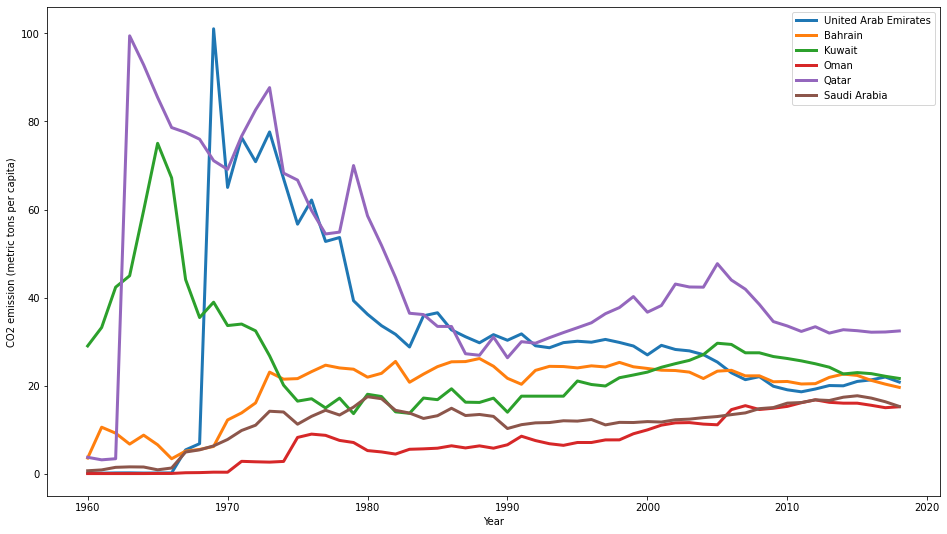

In [0]:
years = np.array(range(1960,2019))
plt.figure(figsize=(16,9))

plt.xlabel("Year")
plt.ylabel("CO2 emission (metric tons per capita)")
plt.plot(years, gcc_data, linewidth=3)
plt.legend(gulf_countries)

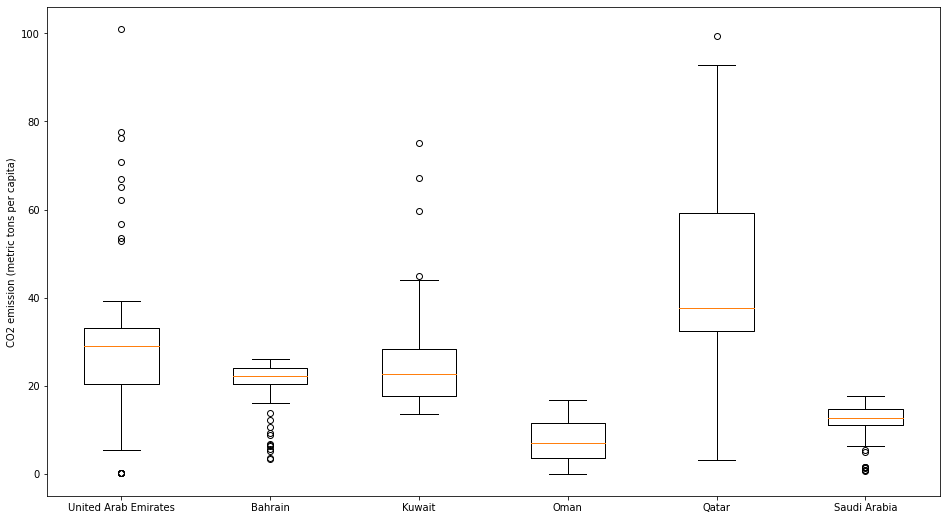

In [0]:
plt.figure(figsize=(16,9))

plt.ylabel("CO2 emission (metric tons per capita)")
plt.boxplot(gcc_data, labels=gulf_countries)
plt.show()

We see the CO2 emissions of the gulf countries over the years, the ranges of the values of the emissions and how the countries compare to each other in terms of CO2 emissions (metric tons per capita)

### Creating ML Models and Predict CO2 Emissions of Gulf Countries in 2025

In [0]:
x = years.reshape(-1,1)
y_UAE = np.array(gcc_data['United Arab Emirates']).reshape(-1,1)
y_BHR = np.array(gcc_data['Bahrain']).reshape(-1,1)
y_KWT = np.array(gcc_data['Kuwait']).reshape(-1,1)
y_OMN = np.array(gcc_data['Oman']).reshape(-1,1)
y_QAT = np.array(gcc_data['Qatar']).reshape(-1,1)
y_SAU = np.array(gcc_data['Saudi Arabia']).reshape(-1,1)

In [0]:
LR_y_pred = dict.fromkeys(gulf_countries)

LRmodel_accuracy = []

LRmodelUAE = LinearRegression()
LRmodelUAE.fit(x,y_UAE)
LRmodel_accuracy.append(explained_variance_score(y_UAE, LRmodelUAE.predict(x)))

LRmodelBHR = LinearRegression()
LRmodelBHR.fit(x,y_BHR)
LRmodel_accuracy.append(explained_variance_score(y_BHR, LRmodelBHR.predict(x)))

LRmodelKWT = LinearRegression()
LRmodelKWT.fit(x,y_KWT)
LRmodel_accuracy.append(explained_variance_score(y_KWT, LRmodelKWT.predict(x)))

LRmodelOMN = LinearRegression()
LRmodelOMN.fit(x,y_OMN)
LRmodel_accuracy.append(explained_variance_score(y_OMN, LRmodelOMN.predict(x)))

LRmodelQAT = LinearRegression()
LRmodelQAT.fit(x,y_QAT)
LRmodel_accuracy.append(explained_variance_score(y_QAT, LRmodelQAT.predict(x)))

LRmodelSAU = LinearRegression()
LRmodelSAU.fit(x,y_SAU)
LRmodel_accuracy.append(explained_variance_score(y_SAU, LRmodelSAU.predict(x)))

print("Model Accuracy:", LRmodel_accuracy)

LR_y_pred['United Arab Emirates'] = LRmodelUAE.predict([[2025]])
LR_y_pred['Bahrain'] = LRmodelBHR.predict([[2025]])
LR_y_pred['Kuwait'] = LRmodelKWT.predict([[2025]])
LR_y_pred['Oman'] = LRmodelOMN.predict([[2025]])
LR_y_pred['Qatar'] = LRmodelQAT.predict([[2025]])
LR_y_pred['Saudi Arabia'] = LRmodelSAU.predict([[2025]])

print('Emissions in 2025:', LR_y_pred)

Model Accuracy: [0.021906904605639155, 0.3876696421048471, 0.17219937740615643, 0.8917878938149465, 0.22755280522118737, 0.538687601477225]
Emissions in 2025: {'United Arab Emirates': array([[23.92761362]]), 'Bahrain': array([[28.23701178]]), 'Kuwait': array([[15.21879348]]), 'Oman': array([[18.21762003]]), 'Qatar': array([[23.87977787]]), 'Saudi Arabia': array([[18.90884265]])}


In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

LGBM_y_pred = dict.fromkeys(gulf_countries)

LGBMmodel_accuracy = []

LGBMmodelUAE = LGBMRegressor()
LGBMmodelUAE.fit(x,y_UAE)
LGBMmodel_accuracy.append(explained_variance_score(y_UAE, LGBMmodelUAE.predict(x)))

LGBMmodelBHR = LGBMRegressor()
LGBMmodelBHR.fit(x,y_BHR)
LGBMmodel_accuracy.append(explained_variance_score(y_BHR, LGBMmodelBHR.predict(x)))

LGBMmodelKWT = LGBMRegressor()
LGBMmodelKWT.fit(x,y_KWT)
LGBMmodel_accuracy.append(explained_variance_score(y_KWT, LGBMmodelKWT.predict(x)))

LGBMmodelOMN = LGBMRegressor()
LGBMmodelOMN.fit(x,y_OMN)
LGBMmodel_accuracy.append(explained_variance_score(y_OMN, LGBMmodelOMN.predict(x)))

LGBMmodelQAT = LGBMRegressor()
LGBMmodelQAT.fit(x,y_QAT)
LGBMmodel_accuracy.append(explained_variance_score(y_QAT, LGBMmodelQAT.predict(x)))

LGBMmodelSAU = LGBMRegressor()
LGBMmodelSAU.fit(x,y_SAU)
LGBMmodel_accuracy.append(explained_variance_score(y_SAU, LGBMmodelSAU.predict(x)))

print("Model AccuRacy:", LGBMmodel_accuracy)

LGBM_y_pred['United Arab Emirates'] = LGBMmodelUAE.predict([[2025]])
LGBM_y_pred['Bahrain'] = LGBMmodelBHR.predict([[2025]])
LGBM_y_pred['Kuwait'] = LGBMmodelKWT.predict([[2025]])
LGBM_y_pred['Oman'] = LGBMmodelOMN.predict([[2025]])
LGBM_y_pred['Qatar'] = LGBMmodelQAT.predict([[2025]])
LGBM_y_pred['Saudi Arabia'] = LGBMmodelSAU.predict([[2025]])

print('Emissions in 2025:', LGBM_y_pred)

Model AccuRacy: [0.07777579440604965, 0.4595567562764511, 0.3042637989309128, 0.7919196042763932, 0.4098654424352709, 0.3890957842403948]
Emissions in 2025: {'United Arab Emirates': array([23.1920232]), 'Bahrain': array([22.197964]), 'Kuwait': array([24.6755913]), 'Oman': array([13.82604771]), 'Qatar': array([36.63513352]), 'Saudi Arabia': array([14.43338318])}


In [0]:
KNN_y_pred = dict.fromkeys(gulf_countries)

KNNmodel_accuracy = []

KNNmodelUAE = KNeighborsRegressor(n_neighbors=5)
KNNmodelUAE.fit(x,y_UAE)
KNNmodel_accuracy.append(explained_variance_score(y_UAE, KNNmodelUAE.predict(x)))

KNNmodelBHR = KNeighborsRegressor(n_neighbors=3)
KNNmodelBHR.fit(x,y_BHR)
KNNmodel_accuracy.append(explained_variance_score(y_BHR, KNNmodelBHR.predict(x)))

KNNmodelKWT = KNeighborsRegressor(n_neighbors=3)
KNNmodelKWT.fit(x,y_KWT)
KNNmodel_accuracy.append(explained_variance_score(y_KWT, KNNmodelKWT.predict(x)))

KNNmodelOMN = KNeighborsRegressor(n_neighbors=3)
KNNmodelOMN.fit(x,y_OMN)
KNNmodel_accuracy.append(explained_variance_score(y_OMN, KNNmodelOMN.predict(x)))

KNNmodelQAT = KNeighborsRegressor(n_neighbors=3)
KNNmodelQAT.fit(x,y_QAT)
KNNmodel_accuracy.append(explained_variance_score(y_QAT, KNNmodelQAT.predict(x)))

KNNmodelSAU = KNeighborsRegressor(n_neighbors=3)
KNNmodelSAU.fit(x,y_SAU)
KNNmodel_accuracy.append(explained_variance_score(y_SAU, KNNmodelSAU.predict(x)))

print("Model Accuracy:", KNNmodel_accuracy)

KNN_y_pred['United Arab Emirates'] = KNNmodelUAE.predict([[2025]])
KNN_y_pred['Bahrain'] = KNNmodelBHR.predict([[2025]])
KNN_y_pred['Kuwait'] = KNNmodelKWT.predict([[2025]])
KNN_y_pred['Oman'] = KNNmodelOMN.predict([[2025]])
KNN_y_pred['Qatar'] = KNNmodelQAT.predict([[2025]])
KNN_y_pred['Saudi Arabia'] = KNNmodelSAU.predict([[2025]])

print('Emissions in 2025:', KNN_y_pred)

Model Accuracy: [0.8468997459545445, 0.9715045596345339, 0.972467870836633, 0.9919799808190594, 0.9096552961753215, 0.9863890759735388]
Emissions in 2025: {'United Arab Emirates': array([[20.9911334]]), 'Bahrain': array([[20.36926506]]), 'Kuwait': array([[22.15248441]]), 'Oman': array([[15.23270277]]), 'Qatar': array([[32.24101727]]), 'Saudi Arabia': array([[16.25462278]])}


### Understanding the Predictions

The besy way to understand the CO2 emissions prediction is by visualising it.

In [0]:
LR_pred = [LR_y_pred[key][0][0] for key in LR_y_pred.keys()]
LGBM_pred = [LGBM_y_pred[key][0] for key in LGBM_y_pred.keys()]
KNN_pred = [KNN_y_pred[key][0][0] for key in KNN_y_pred.keys()]

# print(KNN_pred)

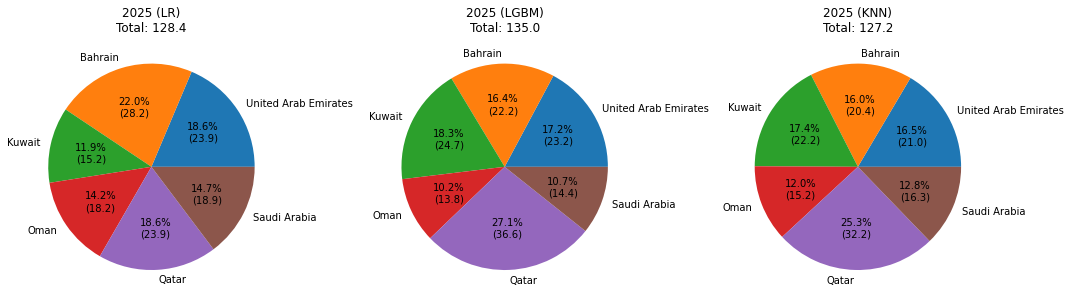

In [0]:
def func(pct, allvalues):
    absolute = pct / 100.*np.sum(allvalues)
    return "{:.1f}%\n({:.1f})".format(pct, absolute)

fig, grid = plt.subplots(1,3, figsize=(15,10))

grid[0].set_title("2025 (LR)\nTotal: {:.1f}".format(np.sum(LR_pred)))
grid[0].pie(LR_pred,
            autopct = lambda pct: func(pct, LR_pred),
            labels=gulf_countries)

grid[1].set_title("2025 (LGBM)\nTotal: {:.1f}".format(np.sum(LGBM_pred)))
grid[1].pie(LGBM_pred,
            autopct = lambda pct: func(pct, LGBM_pred),
            labels=gulf_countries)

grid[2].set_title("2025 (KNN)\nTotal: {:.1f}".format(np.sum(KNN_pred)))
grid[2].pie(KNN_pred,
            autopct = lambda pct: func(pct, KNN_pred),
            labels=gulf_countries)

fig.tight_layout()
plt.show()

As expected, different models give different results.

- The linear regression predictions varies much more than tha LGBM and KNN regression predictions - which are pretty similar to each other.
- The LR model predicts Bahrain to be the maximum contributor of CO2 emission (metric tons per capita), while the LGBM and KNN model predicts Qatar to be the maximum contributor for the same.

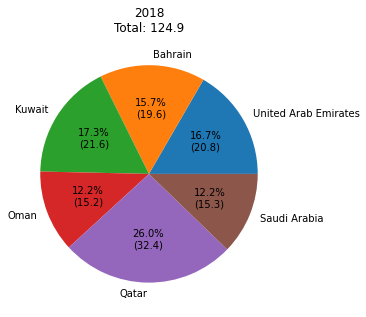

In [0]:
co2e_2018 = []
for e in gcc_data.loc[['2018']].values[0]:
    co2e_2018.append(e)

plt.figure(figsize=(8,5))

plt.title("2018\nTotal: {:.1f}".format(np.sum(co2e_2018)))
plt.pie(co2e_2018,
        autopct = lambda pct: func(pct, co2e_2018),
        labels=gulf_countries)

plt.show()

- Although the prediction of the models vary, they all show an increase in the total CO2 emission (metric tons per capita) in the gulf countries.
- Even so, Oman and Saudi Arabia continue to be the least contributors to the total.

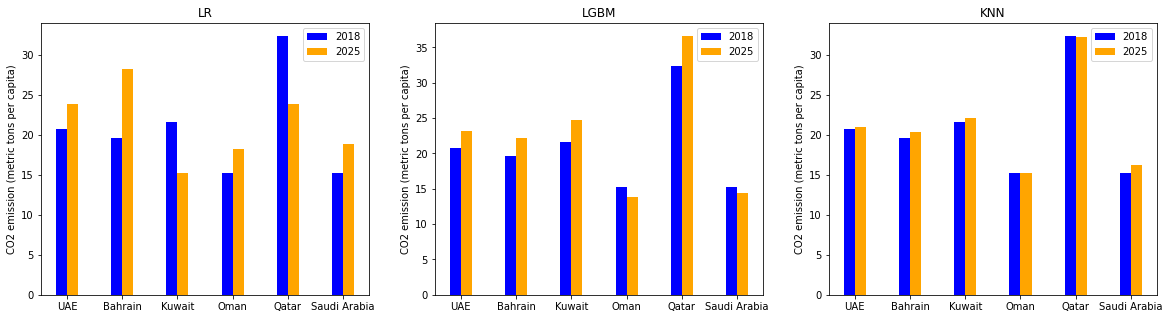

In [0]:
gulf = ["UAE", "Bahrain", "Kuwait", "Oman", "Qatar", "Saudi Arabia"]

fig, grid = plt.subplots(1,3, figsize=(20,5))

grid[0].set_ylabel("CO2 emission (metric tons per capita)")
grid[0].set_title("LR")
grid[0].bar(gulf, co2e_2018, width=-0.2, color='b', align='edge')
grid[0].bar(gulf, LR_pred, width=0.2, color='orange', align='edge')
grid[0].legend(('2018','2025'))

grid[1].set_ylabel("CO2 emission (metric tons per capita)")
grid[1].set_title("LGBM")
grid[1].bar(gulf, co2e_2018, width=-0.2, color='b', align='edge')
grid[1].bar(gulf, LGBM_pred, width=0.2, color='orange', align='edge')
grid[1].legend(('2018','2025'))

grid[2].set_ylabel("CO2 emission (metric tons per capita)")
grid[2].set_title("KNN")
grid[2].bar(gulf, co2e_2018, width=-0.2, color='b', align='edge')
grid[2].bar(gulf, KNN_pred, width=0.2, color='orange', align='edge')
grid[2].legend(('2018','2025'))

plt.show()

### Models Generated for the Countries

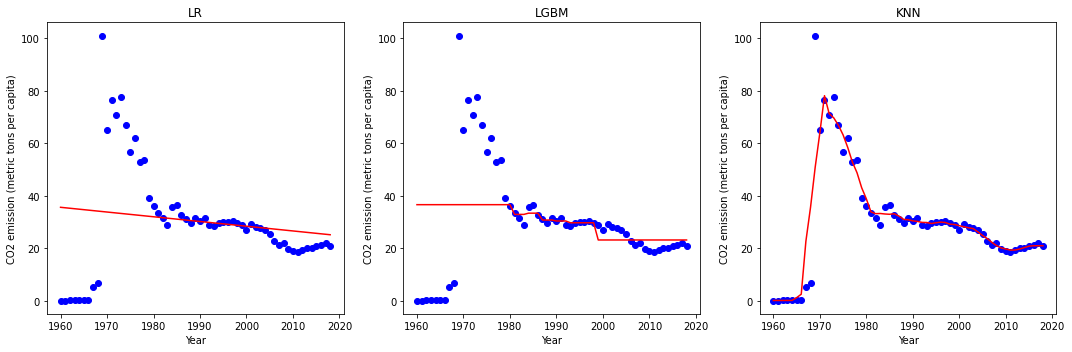

In [0]:
fig, grid = plt.subplots(1,3, figsize=(15,5))

grid[0].set_title("LR")
grid[0].set_xlabel("Year")
grid[0].set_ylabel("CO2 emission (metric tons per capita)")
grid[0].scatter(years,gcc_data['United Arab Emirates'], color='blue')
grid[0].plot(years,LRmodelUAE.predict(x), color='red')

grid[1].set_title("LGBM")
grid[1].set_xlabel("Year")
grid[1].set_ylabel("CO2 emission (metric tons per capita)")
grid[1].scatter(years,gcc_data['United Arab Emirates'], color='blue')
grid[1].plot(years,LGBMmodelUAE.predict(x), color='red')

grid[2].set_title("KNN")
grid[2].set_xlabel("Year")
grid[2].set_ylabel("CO2 emission (metric tons per capita)")
grid[2].scatter(years,gcc_data['United Arab Emirates'], color='blue')
grid[2].plot(years,KNNmodelUAE.predict(x), color='red')

fig.tight_layout()
plt.show()

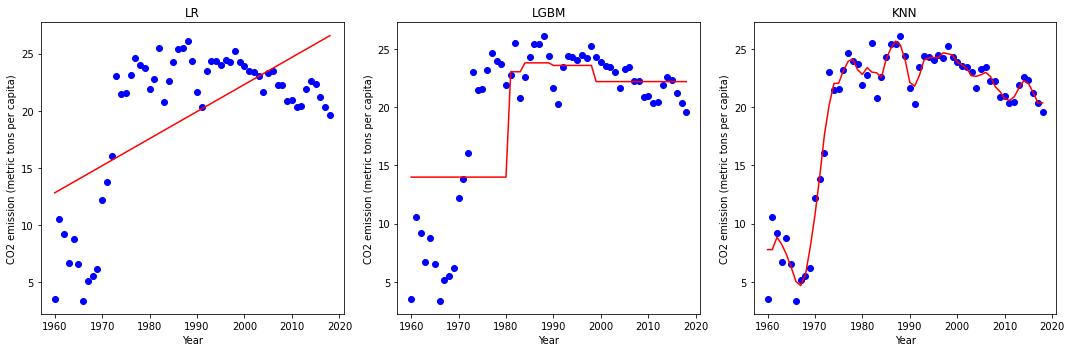

In [0]:
fig, grid = plt.subplots(1,3, figsize=(15,5))

grid[0].set_title("LR")
grid[0].set_xlabel("Year")
grid[0].set_ylabel("CO2 emission (metric tons per capita)")
grid[0].scatter(years,gcc_data['Bahrain'], color='blue')
grid[0].plot(years,LRmodelBHR.predict(x), color='red')

grid[1].set_title("LGBM")
grid[1].set_xlabel("Year")
grid[1].set_ylabel("CO2 emission (metric tons per capita)")
grid[1].scatter(years,gcc_data['Bahrain'], color='blue')
grid[1].plot(years,LGBMmodelBHR.predict(x), color='red')

grid[2].set_title("KNN")
grid[2].set_xlabel("Year")
grid[2].set_ylabel("CO2 emission (metric tons per capita)")
grid[2].scatter(years,gcc_data['Bahrain'], color='blue')
grid[2].plot(years,KNNmodelBHR.predict(x), color='red')

fig.tight_layout()
plt.show()

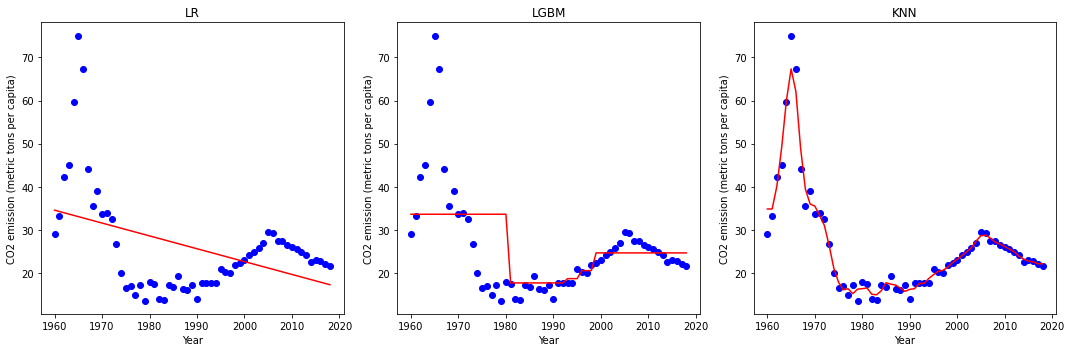

In [0]:
fig, grid = plt.subplots(1,3, figsize=(15,5))

grid[0].set_title("LR")
grid[0].set_xlabel("Year")
grid[0].set_ylabel("CO2 emission (metric tons per capita)")
grid[0].scatter(years,gcc_data['Kuwait'], color='blue')
grid[0].plot(years,LRmodelKWT.predict(x), color='red')

grid[1].set_title("LGBM")
grid[1].set_xlabel("Year")
grid[1].set_ylabel("CO2 emission (metric tons per capita)")
grid[1].scatter(years,gcc_data['Kuwait'], color='blue')
grid[1].plot(years,LGBMmodelKWT.predict(x), color='red')

grid[2].set_title("KNN")
grid[2].set_xlabel("Year")
grid[2].set_ylabel("CO2 emission (metric tons per capita)")
grid[2].scatter(years,gcc_data['Kuwait'], color='blue')
grid[2].plot(years,KNNmodelKWT.predict(x), color='red')

fig.tight_layout()
plt.show()

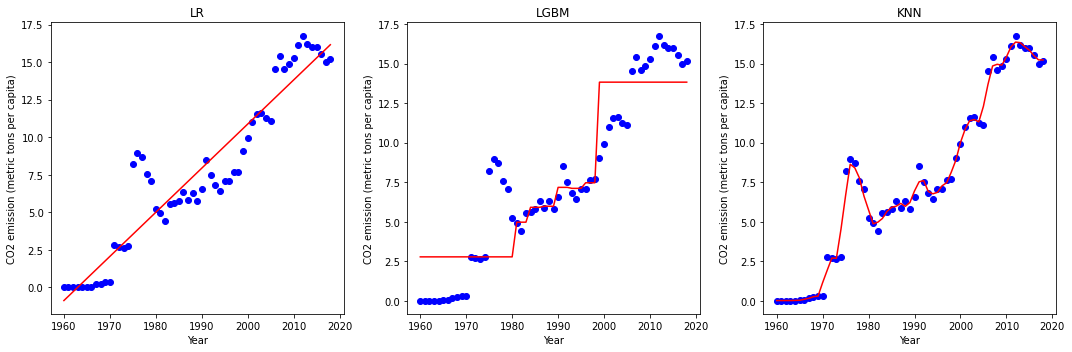

In [0]:
fig, grid = plt.subplots(1,3, figsize=(15,5))

grid[0].set_title("LR")
grid[0].set_xlabel("Year")
grid[0].set_ylabel("CO2 emission (metric tons per capita)")
grid[0].scatter(years,gcc_data['Oman'], color='blue')
grid[0].plot(years,LRmodelOMN.predict(x), color='red')

grid[1].set_title("LGBM")
grid[1].set_xlabel("Year")
grid[1].set_ylabel("CO2 emission (metric tons per capita)")
grid[1].scatter(years,gcc_data['Oman'], color='blue')
grid[1].plot(years,LGBMmodelOMN.predict(x), color='red')

grid[2].set_title("KNN")
grid[2].set_xlabel("Year")
grid[2].set_ylabel("CO2 emission (metric tons per capita)")
grid[2].scatter(years,gcc_data['Oman'], color='blue')
grid[2].plot(years,KNNmodelOMN.predict(x), color='red')

fig.tight_layout()
plt.show()

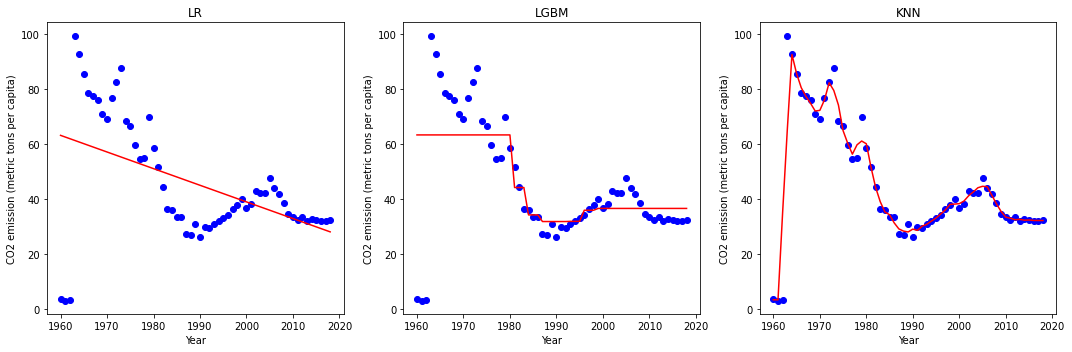

In [0]:
fig, grid = plt.subplots(1,3, figsize=(15,5))

grid[0].set_title("LR")
grid[0].set_xlabel("Year")
grid[0].set_ylabel("CO2 emission (metric tons per capita)")
grid[0].scatter(years,gcc_data['Qatar'], color='blue')
grid[0].plot(years,LRmodelQAT.predict(x), color='red')

grid[1].set_title("LGBM")
grid[1].set_xlabel("Year")
grid[1].set_ylabel("CO2 emission (metric tons per capita)")
grid[1].scatter(years,gcc_data['Qatar'], color='blue')
grid[1].plot(years,LGBMmodelQAT.predict(x), color='red')

grid[2].set_title("KNN")
grid[2].set_xlabel("Year")
grid[2].set_ylabel("CO2 emission (metric tons per capita)")
grid[2].scatter(years,gcc_data['Qatar'], color='blue')
grid[2].plot(years,KNNmodelQAT.predict(x), color='red')

fig.tight_layout()
plt.show()

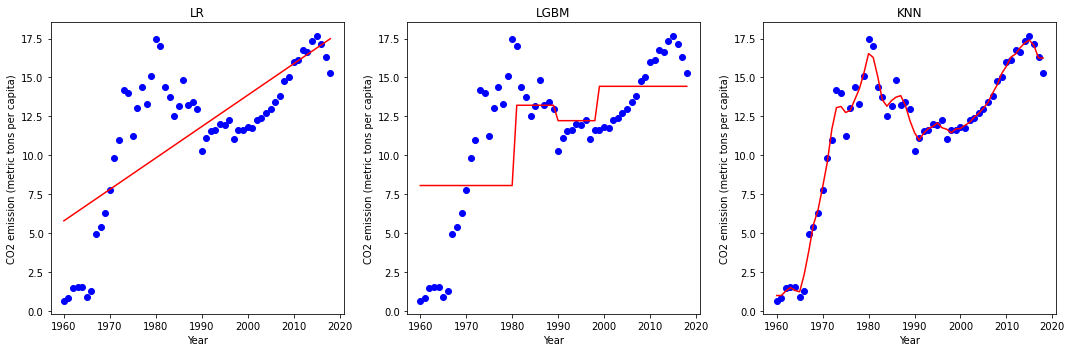

In [0]:
fig, grid = plt.subplots(1,3, figsize=(15,5))

grid[0].set_title("LR")
grid[0].set_xlabel("Year")
grid[0].set_ylabel("CO2 emission (metric tons per capita)")
grid[0].scatter(years,gcc_data['Saudi Arabia'], color='blue')
grid[0].plot(years,LRmodelSAU.predict(x), color='red')

grid[1].set_title("LGBM")
grid[1].set_xlabel("Year")
grid[1].set_ylabel("CO2 emission (metric tons per capita)")
grid[1].scatter(years,gcc_data['Saudi Arabia'], color='blue')
grid[1].plot(years,LGBMmodelSAU.predict(x), color='red')

grid[2].set_title("KNN")
grid[2].set_xlabel("Year")
grid[2].set_ylabel("CO2 emission (metric tons per capita)")
grid[2].scatter(years,gcc_data['Saudi Arabia'], color='blue')
grid[2].plot(years,KNNmodelSAU.predict(x), color='red')

fig.tight_layout()
plt.show()